In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Data Cleaning

In [5]:
df.duplicated().any()

False

In [6]:
df.isnull().any()

Unnamed: 0          False
id                  False
member_id           False
loan_amnt           False
funded_amnt         False
                    ...  
all_util             True
total_rev_hi_lim     True
inq_fi               True
total_cu_tl          True
inq_last_12m         True
Length: 75, dtype: bool

In [7]:
#Seperate numerical null & categorical null
cats_null = []
nums_null = []
for i in df.columns:
    if ((df[i].dtype == object) & (df[i].isnull().any() == True)):
        cats_col = i
        cats_null.append(cats_col)
    elif (((df[i].dtype == float) or (df[i].dtype == int))  & (df[i].isnull().any() == True)):
        nums_col = i
        nums_null.append(nums_col)

#Dataframe for null category
number_of_missing_data = list(df[cats_null].isnull().sum())
percentage_missing_data = list(round(df[cats_null].isnull().sum() / df[cats_null].shape[0] *100 , 2))
df_cats_null = pd.DataFrame(data = cats_null, columns=['null_category'])
df_cats_null['number_of_missing_data'] = number_of_missing_data
df_cats_null['percentage_missing_data (%)'] = percentage_missing_data
df_cats_null.sort_values('percentage_missing_data (%)',inplace=True)

#Dataframe for null numeric
number_of_missing_data = list(df[nums_null].isnull().sum())
percentage_missing_data = list(round(df[nums_null].isnull().sum() / df[nums_null].shape[0] *100 , 2))
df_nums_null = pd.DataFrame(data = nums_null, columns=['null_nums'])
df_nums_null['number_of_missing_data'] = number_of_missing_data
df_nums_null['percentage_missing_data (%)'] = percentage_missing_data
df_nums_null.sort_values('percentage_missing_data (%)',inplace=True)

In [8]:
df_cats_null

,null_category,number_of_missing_data,percentage_missing_data (%)
3,title,20,0.00
4,earliest_cr_line,29,0.01
7,last_credit_pull_d,42,0.01
5,last_pymnt_d,376,0.08
1,emp_length,21008,4.51
0,emp_title,27588,5.92
6,next_pymnt_d,227214,48.73
2,desc,340302,72.98


In [9]:
df_nums_null

,null_nums,number_of_missing_data,percentage_missing_data (%)
0,annual_inc,4,0.00
1,delinq_2yrs,29,0.01
2,inq_last_6mths,29,0.01
5,open_acc,29,0.01
6,pub_rec,29,0.01
8,total_acc,29,0.01
14,acc_now_delinq,29,0.01
9,collections_12_mths_ex_med,145,0.03
7,revol_util,340,0.07
28,total_rev_hi_lim,70276,15.07


### Checking Distribution Of Numerical Features That Have Missing Value

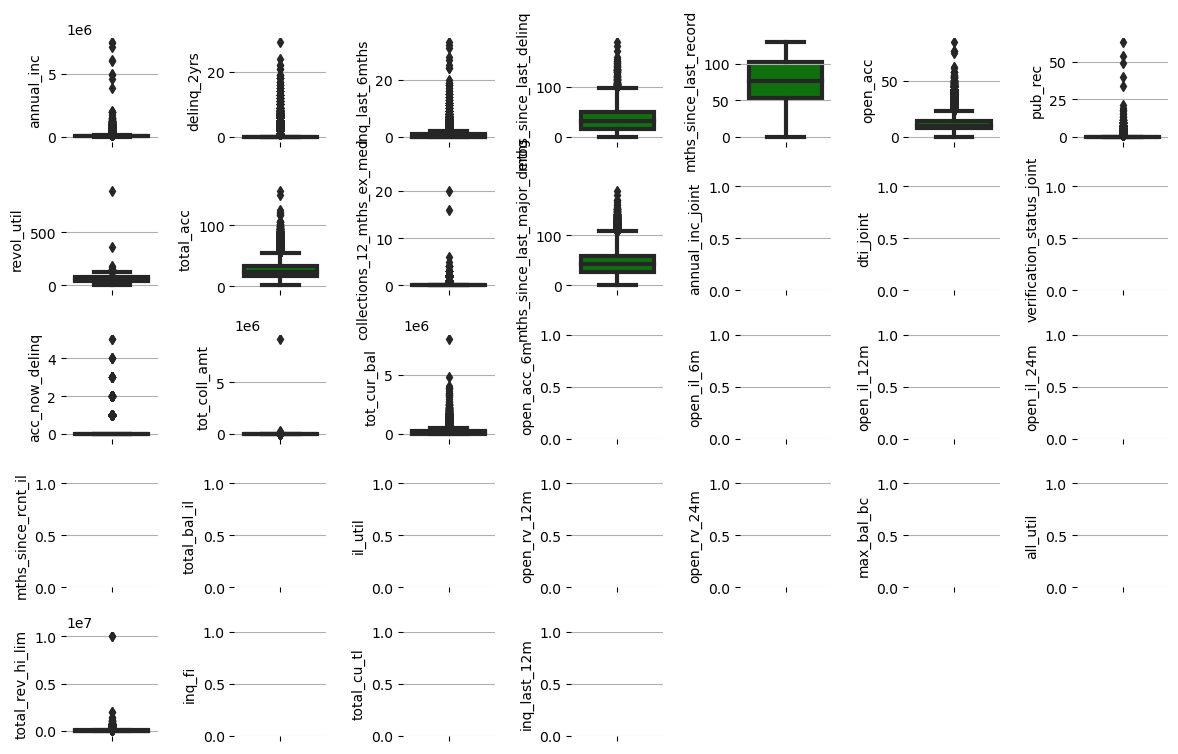

In [10]:
for i in range(len(nums_null)):
    from matplotlib import rcParams
    rcParams['figure.figsize'] = (12, 12)
    rcParams['lines.linewidth'] = 3
    rcParams['xtick.labelsize'] = 'medium'
    rcParams['ytick.labelsize'] = 'medium'
    plt.subplot(8,7,i+1)
    sns.boxplot(y=df[nums_null[i]],color='g',orient='v')
    plt.grid(axis='y')
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout(pad=1.5)

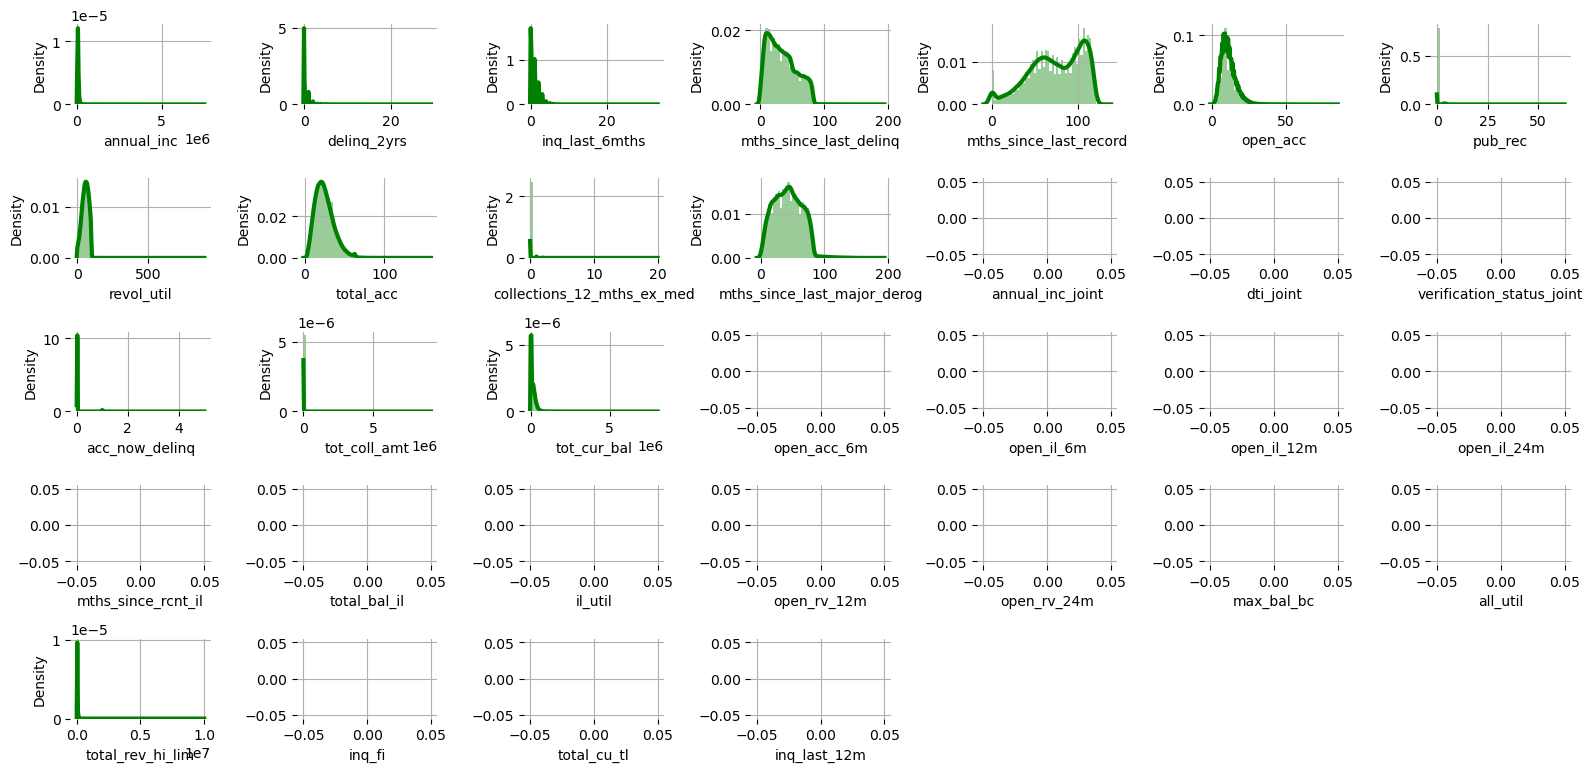

In [11]:
for i in range(len(nums_null)):
    from matplotlib import rcParams
    rcParams['figure.figsize'] = (16, 12)
    rcParams['lines.linewidth'] = 3
    rcParams['xtick.labelsize'] = 'medium'
    rcParams['ytick.labelsize'] = 'medium'
    plt.subplot(8,7,i+1)
    sns.distplot(df[nums_null[i]],color='g')
    plt.grid()
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout()

### Numerical NULL Value Handling

In [12]:
#Drop numercial column that all value is NULL
df.drop(['annual_inc_joint','dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
         'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
         'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],axis=1,inplace=True)

In [13]:
#There are 3 columns that have NULL value percentage > 50% of the data, drop the columns
df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog'],axis=1,inplace=True)

In [14]:
#The other null numerical column will be fill by the median of each column (because the distribution is skewed)
other_numerical_null = ['annual_inc','delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
                        'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
for i in other_numerical_null:
    median = df[i].median()
    df[i] = df[i].fillna(median)

### Categorical Null Value Handling

In [15]:
#Drop categorical column that have NULL value percentage > +-50%
df.drop(['desc','next_pymnt_d'],axis=1,inplace=True)

In [16]:
#The other null categorical column will be fill by the mode of each column
other_categorical_null = ['emp_title','emp_length','title','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in other_categorical_null:
    mode = df[i].mode()
    df[i] = df[i].fillna(mode[0])

### Categorical Format Modification Into Numerical

In [17]:
#term
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [18]:
df['term'] = df['term'].apply(lambda x : 36 if x == ' 36 months' else 60)

In [19]:
#emp_length
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [20]:
df['emp_length'] = df['emp_length'].apply(lambda x : 0 if x=='< 1 year' else 1 if x=='1 year' else 2 if x=='2 years' else
                                          3 if x=='3 years' else 4 if x=='4 years' else 5 if x=='5 years' else
                                          6 if x== '6 years' else 7 if x=='7 years' else 8 if x=='8 years' else
                                          9 if x=='9 years' else 10)

### Fixing Incorrect Value in Categorical Features

In [21]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [22]:
#home_ownership ada value ANY ganti dengan modenya saja yaitu MORTGAGE
df['home_ownership'] = df['home_ownership'].replace('ANY','MORTGAGE')

### Define Target Column

In [23]:
#Loan status = Current status of the loan
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [24]:
#loan_status is a target column, but for now it's have many unique value. It's better to make it into binary target
good_loan = ['Fully Paid', 'Current', 'In Grace Period']
df['loan_status'] = np.where(df['loan_status'].isin(good_loan),1,0)
df['loan_status'].value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

In [25]:
loan_status_viz = pd.DataFrame(data=df['loan_status'].value_counts(normalize=True)).reset_index()
loan_status_viz.columns = ['status_loan','percentage(%)']
loan_status_viz['percentage(%)'] = loan_status_viz['percentage(%)']*100
loan_status_viz

,status_loan,percentage(%)
0,1,88.381784
1,0,11.618216


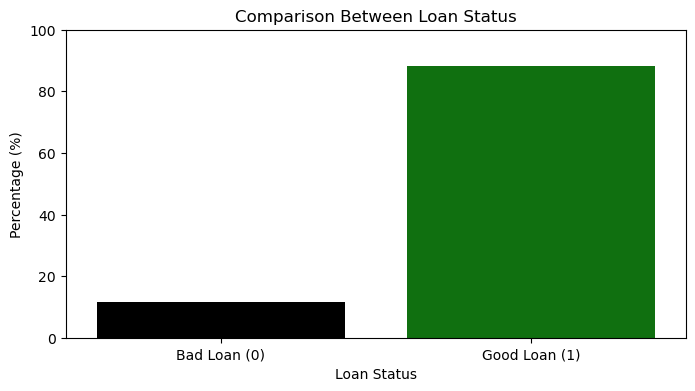

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(x='status_loan', y='percentage(%)',data=loan_status_viz, palette=['black', 'green'])
plt.ylim(0,100)
plt.xlabel('Loan Status', fontsize=10)
plt.ylabel('Percentage (%)', fontsize=10)
plt.title('Comparison Between Loan Status')
plt.xticks([0,1],['Bad Loan (0)', 'Good Loan (1)'])
plt.show()

**Target column (loan_status) mempunyai imbalanced data**, jika diperlukan harus dilakukan teknik oversampling/undersampling atau bisa juga tanpa melakukan oversampling/undersampling tetapi saat menjalankan algoritma menggunakan hyperparameter 'class_weight'.

# Exploratory Data Analysis

In [27]:
#Seperate numerical column & categorical column
nums = []
cats = []
for i in df.columns:
    if df[i].dtype == object:
        cats_cols = i
        cats.append(cats_cols)
    else:
        nums_cols = i
        nums.append(nums_cols)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  int64  
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   466285 non-null  object 
 12  emp_length                  466285 non-null  int64  
 13  home_ownership

In [29]:
df[nums].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,42.605334,13.829236,432.061201,6.173846,...,0.650129,85.344211,8.961534,3123.913796,0.009082,1.0,0.004002,1.629893e+02,1.301714e+05,2.923681e+04
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,10.719040,4.357587,243.485550,3.640525,...,5.265730,552.216084,85.491437,5554.737393,0.108632,0.0,0.068635,1.348289e+04,1.416729e+05,3.443264e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,36.000000,10.990000,256.690000,3.000000,...,0.000000,0.000000,0.000000,312.620000,0.000000,1.0,0.000000,0.000000e+00,3.361100e+04,1.500000e+04
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,36.000000,13.660000,379.890000,7.000000,...,0.000000,0.000000,0.000000,545.960000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,60.000000,16.490000,566.580000,10.000000,...,0.000000,0.000000,0.000000,3187.510000,0.000000,1.0,0.000000,0.000000e+00,1.849300e+05,3.430000e+04
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,60.000000,26.060000,1409.990000,10.000000,...,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [30]:
df[cats].describe()

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,7,35,205475,5,3,91,2,466285,14,63099,888,50,664,2,98,103,1
top,B,B3,Teacher,MORTGAGE,Verified,Oct-14,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Jan-16,INDIVIDUAL
freq,136929,31686,32987,235876,168055,38782,466276,1,274195,164095,5304,71450,3703,303005,179996,327741,466285


* Sekilas terlihat ada beberapa fitur pada kolom numerikal yang memiliki standard deviasi cukup besar saat preprocessing bisa dilakukan normalisasi/standardisasi.
* Feature numerikal `Unnamed: 0` , `id`, dan `member_id` sebenarnya bersifat sebagai string bukanlah numerik, namun fitur2 ini dirasa juga tidak akan berguna untuk pemodelan. Saat preprocessing dapat dibuang.
* Untuk fitur kategorikal ada beberapa fitur yang memiliki nilai unique yang cukup banyak terkadang ketika suatu fitur memiliki nilai unique yang banyak maka fitur tersebut tidak terlalu berguna sebagai predictor
* Fitur `zip_code` tidak ditampilkan angka keseluruhannya, ada symbol 'xx' yang digunakan untuk sensor. Sehingga fitur ini tidak akan berguna untuk pemodelan.
* Fitur `application_type` hanya memiliki unique value sebanyak 1 saat preprocessing bisa dibuang.

### Univariate Analylsis

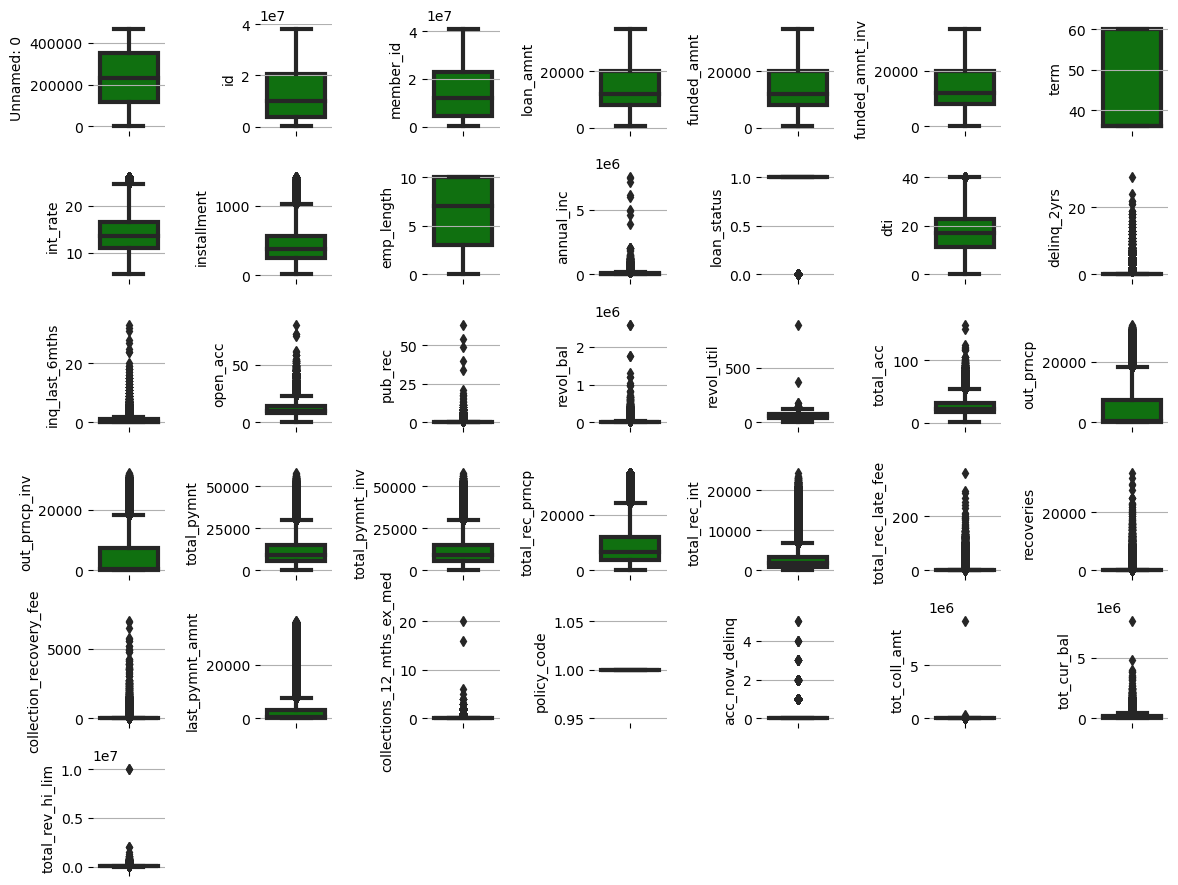

In [31]:
for i in range(len(nums)):
    from matplotlib import rcParams
    rcParams['figure.figsize'] = (12, 12)
    rcParams['lines.linewidth'] = 3
    rcParams['xtick.labelsize'] = 'medium'
    rcParams['ytick.labelsize'] = 'medium'
    plt.subplot(8,7,i+1)
    sns.boxplot(y=df[nums[i]],color='g',orient='v')
    plt.grid(axis='y')
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout(pad=1.5)

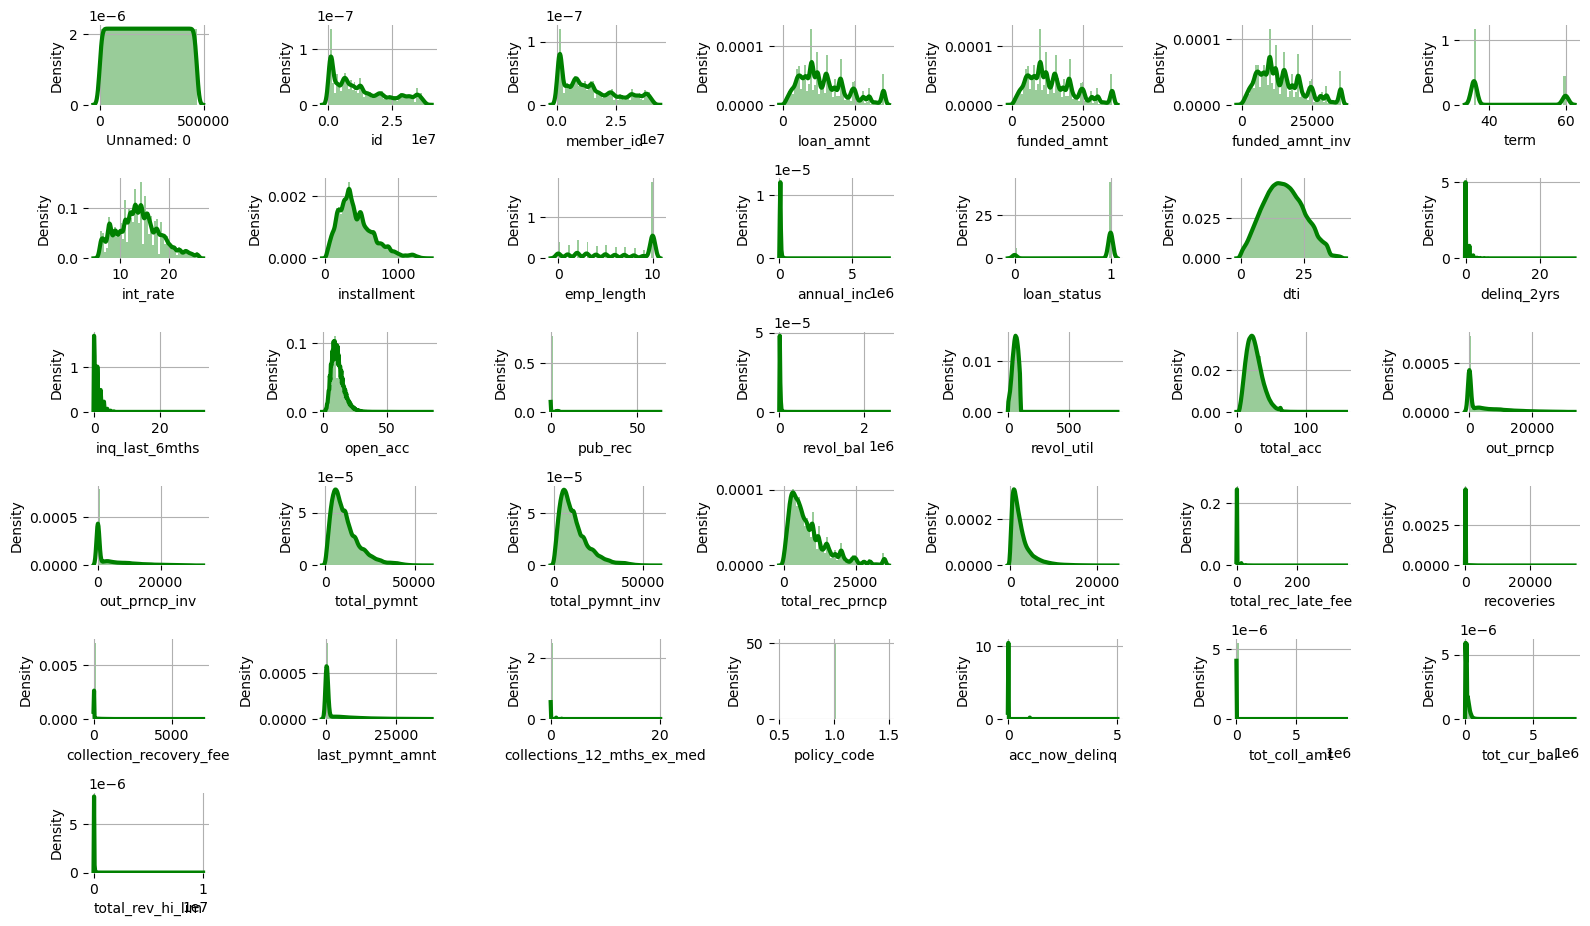

In [32]:
for i in range(len(nums)):
    from matplotlib import rcParams
    rcParams['figure.figsize'] = (16, 12)
    rcParams['lines.linewidth'] = 3
    rcParams['xtick.labelsize'] = 'medium'
    rcParams['ytick.labelsize'] = 'medium'
    plt.subplot(8,7,i+1)
    sns.distplot(df[nums[i]],color='g')
    plt.grid()
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout()

### Multivariate Analysis

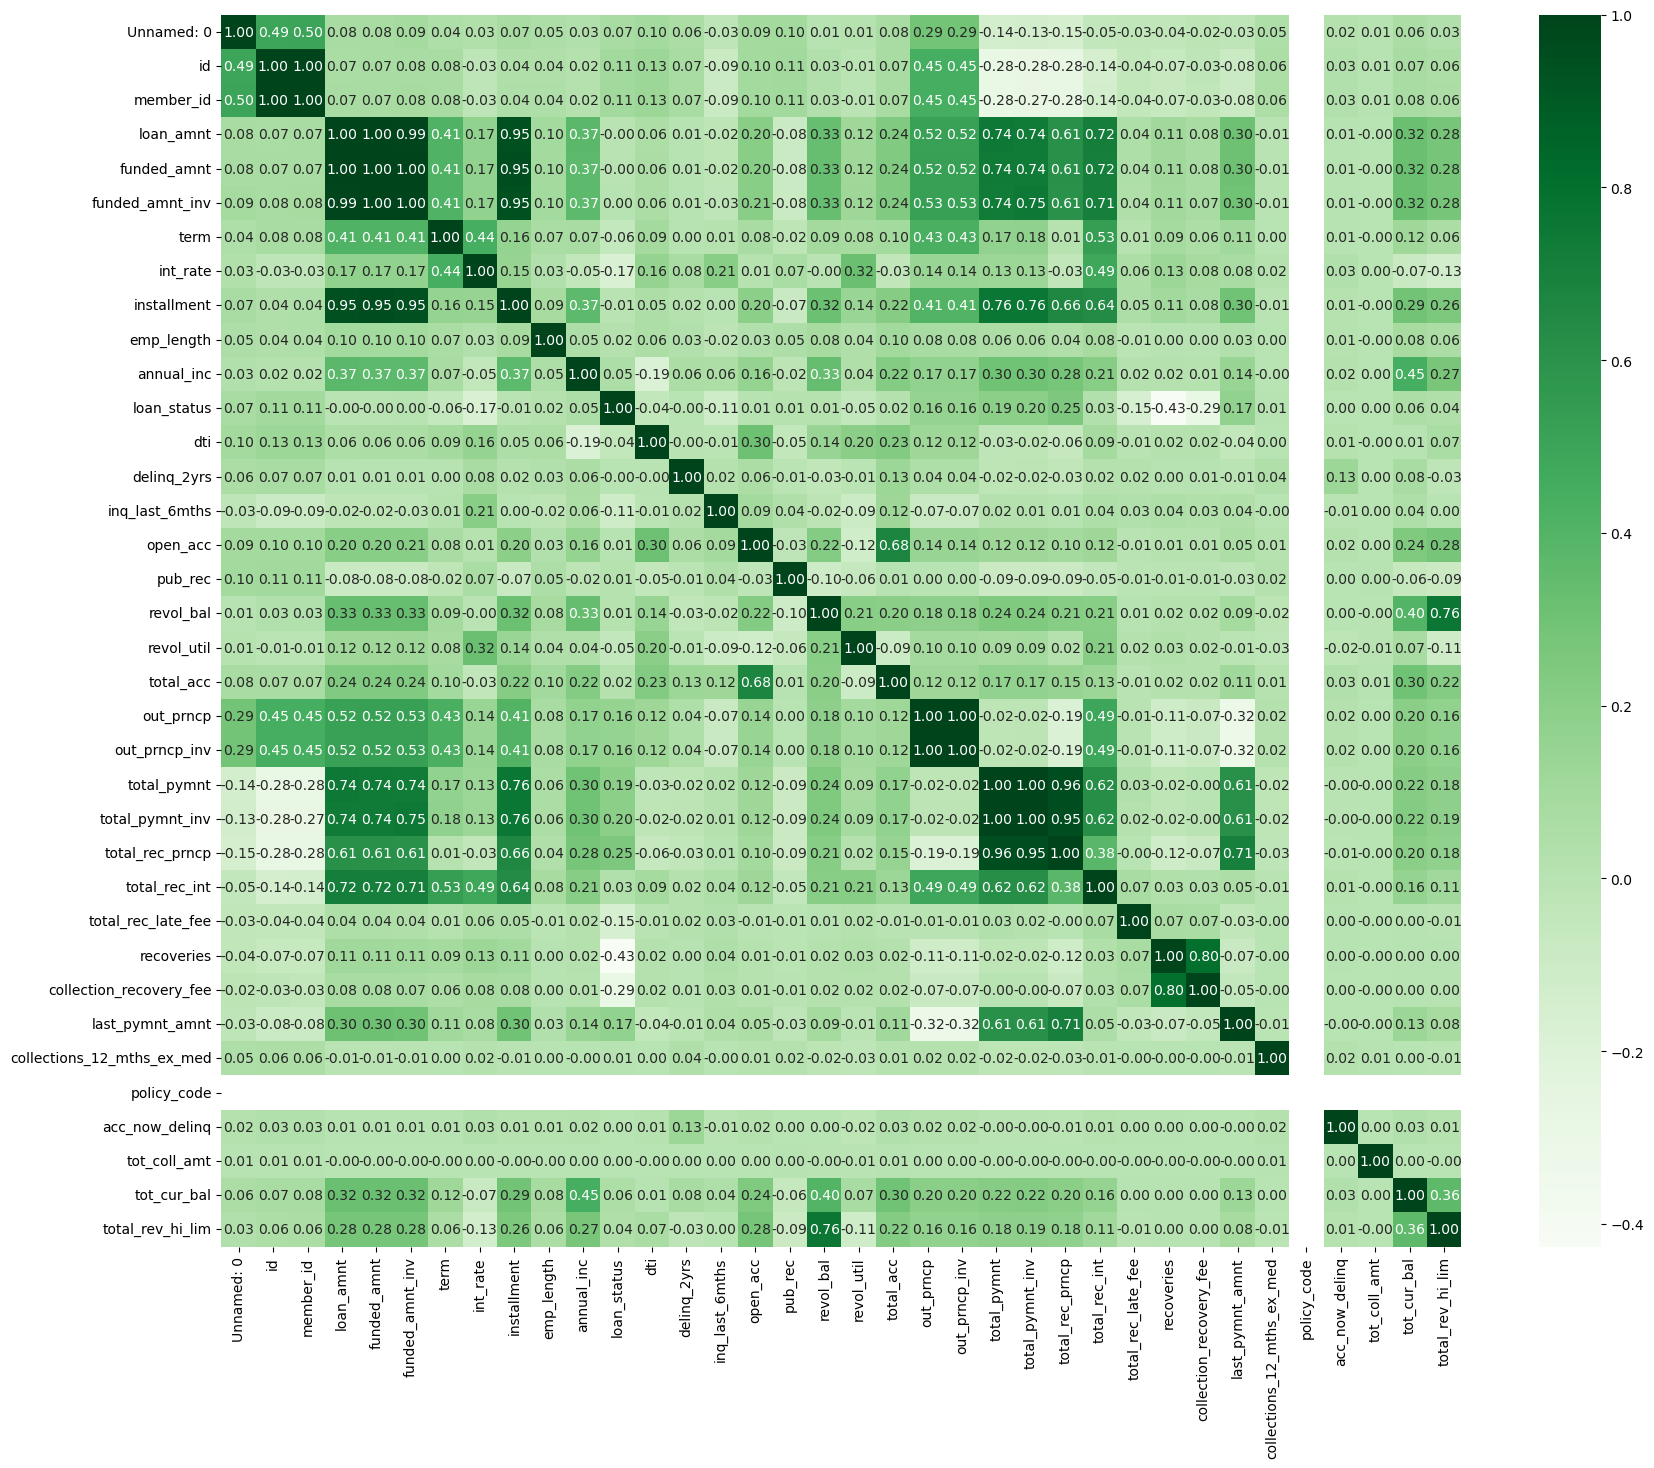

In [33]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

In [34]:
df.corr()['loan_status'].sort_values()

recoveries                   -0.426263
collection_recovery_fee      -0.289116
int_rate                     -0.172282
total_rec_late_fee           -0.154241
inq_last_6mths               -0.110241
term                         -0.058383
revol_util                   -0.047981
dti                          -0.043026
installment                  -0.007176
loan_amnt                    -0.004195
funded_amnt                  -0.003176
delinq_2yrs                  -0.002164
acc_now_delinq                0.000468
tot_coll_amt                  0.001489
funded_amnt_inv               0.003979
collections_12_mths_ex_med    0.005177
open_acc                      0.008081
pub_rec                       0.009916
revol_bal                     0.011045
emp_length                    0.019483
total_acc                     0.024612
total_rec_int                 0.026399
total_rev_hi_lim              0.040070
annual_inc                    0.048963
tot_cur_bal                   0.057112
Unnamed: 0               

List of Redundant Feature (>0.7) :
* revol_bal & total_rev_hi_lim
* collection_recovery_fee & recoveries
* total_rec_prncp & total_pymnt_inv & total_pymnt & last_pymnt_amnt
* total_rec_int & funded_amnt_inv & funded_amnt & loan_amnt
* out_prncp & out_prncp_inv
* installment & total_pymnt & total_pymnt_inv & funded_amnt_inv & funded_amnt & loan_amnt

In [35]:
#The Number Of Lender For Each Lending Purpose

total_purpose = df.groupby(['purpose']).agg({'id':'count'}).reset_index()
total_purpose.columns = ['purpose','total']
total_purpose

,purpose,total
0,car,5397
1,credit_card,104157
2,debt_consolidation,274195
3,educational,422
4,home_improvement,26537
5,house,2269
6,major_purchase,9828
7,medical,4602
8,moving,2994
9,other,23690


In [36]:
# Data Frame for "The Percentage For Each Lending Purpose In Each Tenure"

insight_term_purpose = df.groupby(['purpose','term']).agg({'id':'count'}).reset_index()
insight_term_purpose.columns = ['purpose','term','total purpose-term']
insight_term_purpose = insight_term_purpose.merge(total_purpose,how='inner',left_on='purpose', 
                                                  right_on='purpose')
insight_term_purpose['ratio (%)'] = round((insight_term_purpose['total purpose-term'] / insight_term_purpose['total']) * 100 ,2)

In [37]:
insight_term_purpose

,purpose,term,total purpose-term,total,ratio (%)
0,car,36,4185,5397,77.54
1,car,60,1212,5397,22.46
2,credit_card,36,79730,104157,76.55
3,credit_card,60,24427,104157,23.45
4,debt_consolidation,36,190780,274195,69.58
5,debt_consolidation,60,83415,274195,30.42
6,educational,36,405,422,95.97
7,educational,60,17,422,4.03
8,home_improvement,36,18665,26537,70.34
9,home_improvement,60,7872,26537,29.66


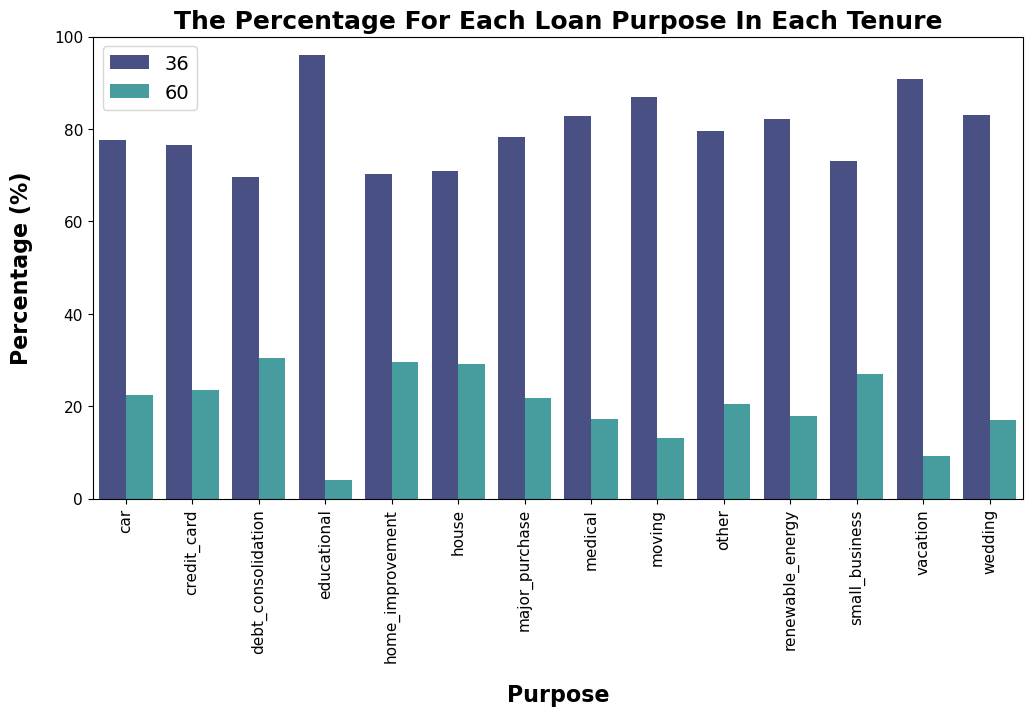

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=insight_term_purpose['purpose'],y=insight_term_purpose['ratio (%)'],
            hue=insight_term_purpose['term'], palette='mako')
plt.ylim(0,100)
plt.title('The Percentage For Each Loan Purpose In Each Tenure', fontsize=18, fontweight='bold')
plt.xlabel('Purpose', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Percentage (%)', fontsize=16, fontweight='bold', labelpad=15)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=14)
plt.show()

* Dapat dilihat bahwa para peminjam yang meminjam dana kepada LC untuk **tujuan apapun relatif akan memilih tenor pinjaman selama 36 bulan dibandingkan dengan 60 bulan**, hal ini pasti disebabkan oleh bunga yang akan lebih mahal ketika memilih tenor 60 bulan. Namun sebenarnya ada juga para peminjam yang memiliki alasan tertentu sehingga memutuskan untuk memilih tenor 60 bulan, salah satunya adalah peminjam untuk **tujuan debt consolidation yang terlihat merupakan paling banyak memilih tenor 60 bulan dibandingkan untuk tujuan lainnya**.

In [39]:
#The Number Of Lender For Each Lending Purpose

total_ls = df.groupby(['purpose']).agg({'id':'count'}).reset_index()
total_ls.columns = ['purpose','total']
total_ls

,purpose,total
0,car,5397
1,credit_card,104157
2,debt_consolidation,274195
3,educational,422
4,home_improvement,26537
5,house,2269
6,major_purchase,9828
7,medical,4602
8,moving,2994
9,other,23690


In [40]:
# Data Frame for "The Percentage For Each Lending Purpose In Every Loan Status"

insight_ls_purpose = df.groupby(['loan_status','purpose']).agg({'id':'count'}).reset_index()
insight_ls_purpose.columns = ['loan_status','purpose','total_ls-purpose']
insight_ls_purpose = insight_ls_purpose.merge(total_ls,how='inner',left_on='purpose', 
                                                  right_on='purpose')
insight_ls_purpose['ratio (%)'] = round((insight_ls_purpose['total_ls-purpose'] / insight_ls_purpose['total']) * 100 ,2)
insight_ls_purpose

,loan_status,purpose,total_ls-purpose,total,ratio (%)
0,0,car,539,5397,9.99
1,1,car,4858,5397,90.01
2,0,credit_card,9471,104157,9.09
3,1,credit_card,94686,104157,90.91
4,0,debt_consolidation,32644,274195,11.91
5,1,debt_consolidation,241551,274195,88.09
6,0,educational,153,422,36.26
7,1,educational,269,422,63.74
8,0,home_improvement,2815,26537,10.61
9,1,home_improvement,23722,26537,89.39


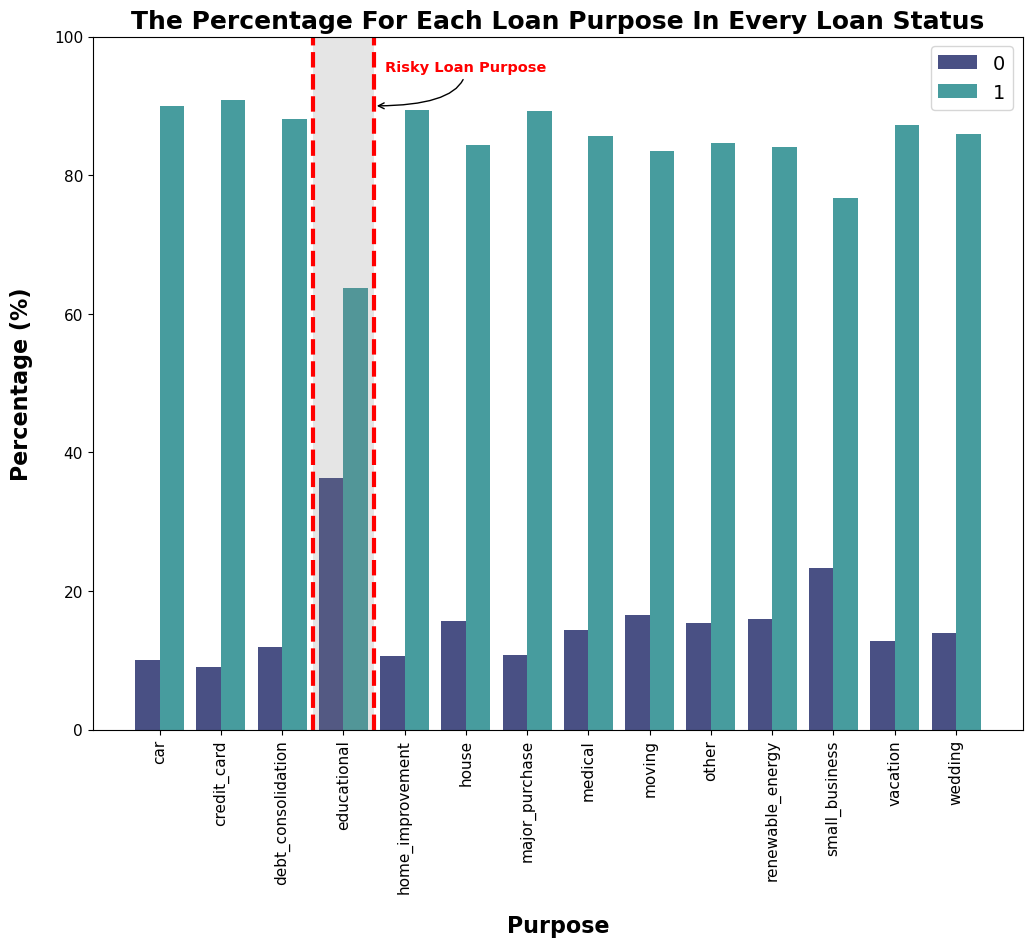

In [41]:
plt.figure(figsize=(12,9))
sns.barplot(x=insight_ls_purpose['purpose'],y=insight_ls_purpose['ratio (%)'],
            hue=insight_ls_purpose['loan_status'], palette='mako')
plt.ylim(0,100)
plt.title('The Percentage For Each Loan Purpose In Every Loan Status', fontsize=18, fontweight='bold')
plt.xlabel('Purpose', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Percentage (%)', fontsize=16, fontweight='bold', labelpad=15)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.axvline(2.5, color='red', linestyle='--')
plt.axvline(3.5, color='red', linestyle='--')
plt.stackplot([2.5,3.5], 100, colors='grey', alpha=0.2)
plt.annotate('Risky Loan Purpose', xy = (3.5, 90), xytext = (5, 95), fontweight='bold',
             arrowprops = dict(facecolor = 'grey', arrowstyle = '->', connectionstyle = 'angle3, angleA=90, angleB=0'), ha = 'center',
             fontsize=10.5,color='red')
plt.legend(fontsize=14)
plt.show()

In [42]:
# Average Interest Rate For Each Lending Purpose

insight_intrate_purpose = df.groupby(['purpose']).agg({'int_rate':'mean'}).reset_index()
insight_intrate_purpose

,purpose,int_rate
0,car,12.126489
1,credit_card,12.564210
2,debt_consolidation,14.117046
3,educational,12.121540
4,home_improvement,13.572315
5,house,15.258184
6,major_purchase,12.829454
7,medical,15.265211
8,moving,16.032826
9,other,15.669362


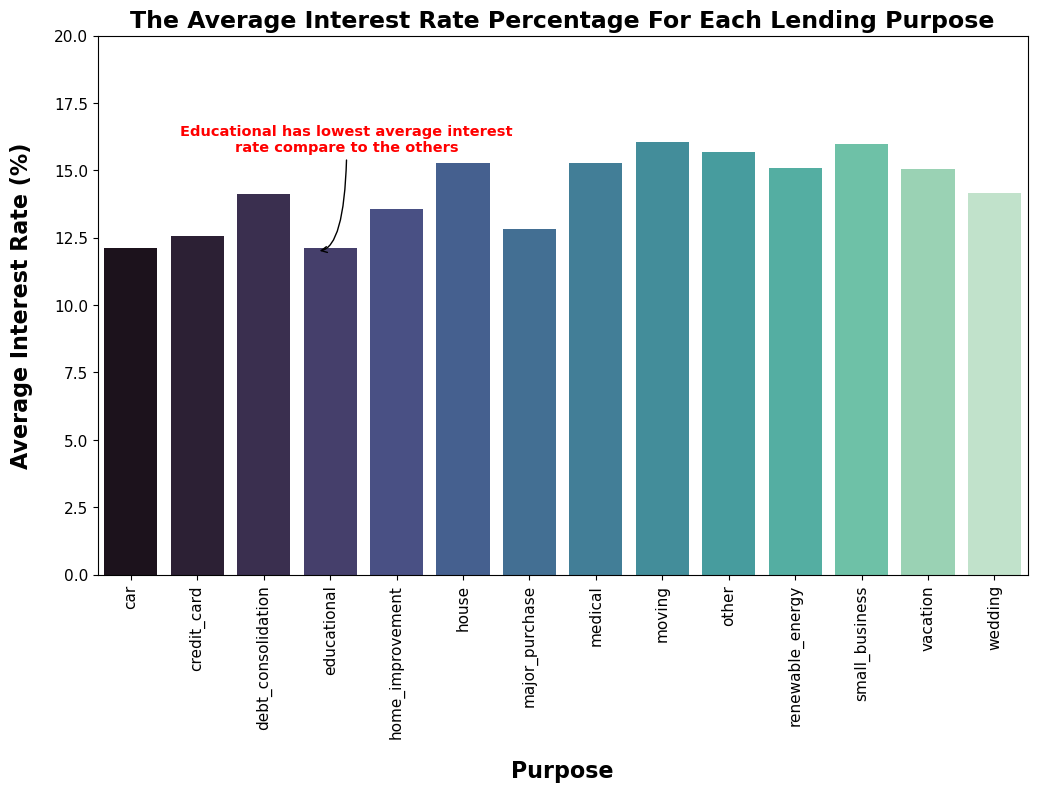

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(x=insight_intrate_purpose['purpose'],y=insight_intrate_purpose['int_rate'],palette='mako')
plt.ylim(0,20)
plt.title('The Average Interest Rate Percentage For Each Lending Purpose', fontsize=17, fontweight='bold')
plt.xlabel('Purpose', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Average Interest Rate (%)', fontsize=16, fontweight='bold', labelpad=15)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.annotate('Educational has lowest average interest\nrate compare to the others', xy = (2.8, 12.0), xytext = (3.25, 15.7), 
             arrowprops = dict(facecolor = 'grey', arrowstyle = '->', connectionstyle = 'angle3, angleA=90, angleB=0'), ha = 'center',
             fontsize=10.5,color='red',fontweight='bold')
plt.show()

* Dapat dilihat bahwa loan purpose educational merupakan tujuan pinjaman yang memiliki **rata-rata interest rate paling kecil dibandingkan dengan purpose lainnya**. Selain itu dapat dilihat bahwa educational termasuk purpose pinjaman yang dapat dibilang beresiko tinggi hal ini dibuktikan bahwa dari keseluruhan lender yang meminjam dana **untuk tujuan educational hampir 40% nya tergolong dalam kategori bad loan**. Hal ini dapat didukung juga oleh referensi melalui link berikut ini dimana bahwa pihak bank juga menetapkan bahwa purpose loan educational/student merupakan kategori loan yang beresiko. https://9jaboizgist.com.ng/2022/06/why-do-many-banks-consider-student-loans-risky-investments.html

# Preprocessing

### Numerical Feature Selection

In [44]:
#drop id, member_id, 'Unnamed: 0' krn tidak berhubungan sama sekali
#zip code juga sebaiknya dibuang karena angka belakangnya di sensor
df.drop(['id','member_id', 'Unnamed: 0','zip_code'],axis=1,inplace=True)

In [45]:
#drop redundant feature (>0.70) & policy_code --> not have correlation to loan_status
df.drop(['policy_code', 'revol_bal', 'collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt',
         'out_prncp_inv', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'],axis=1,inplace=True)

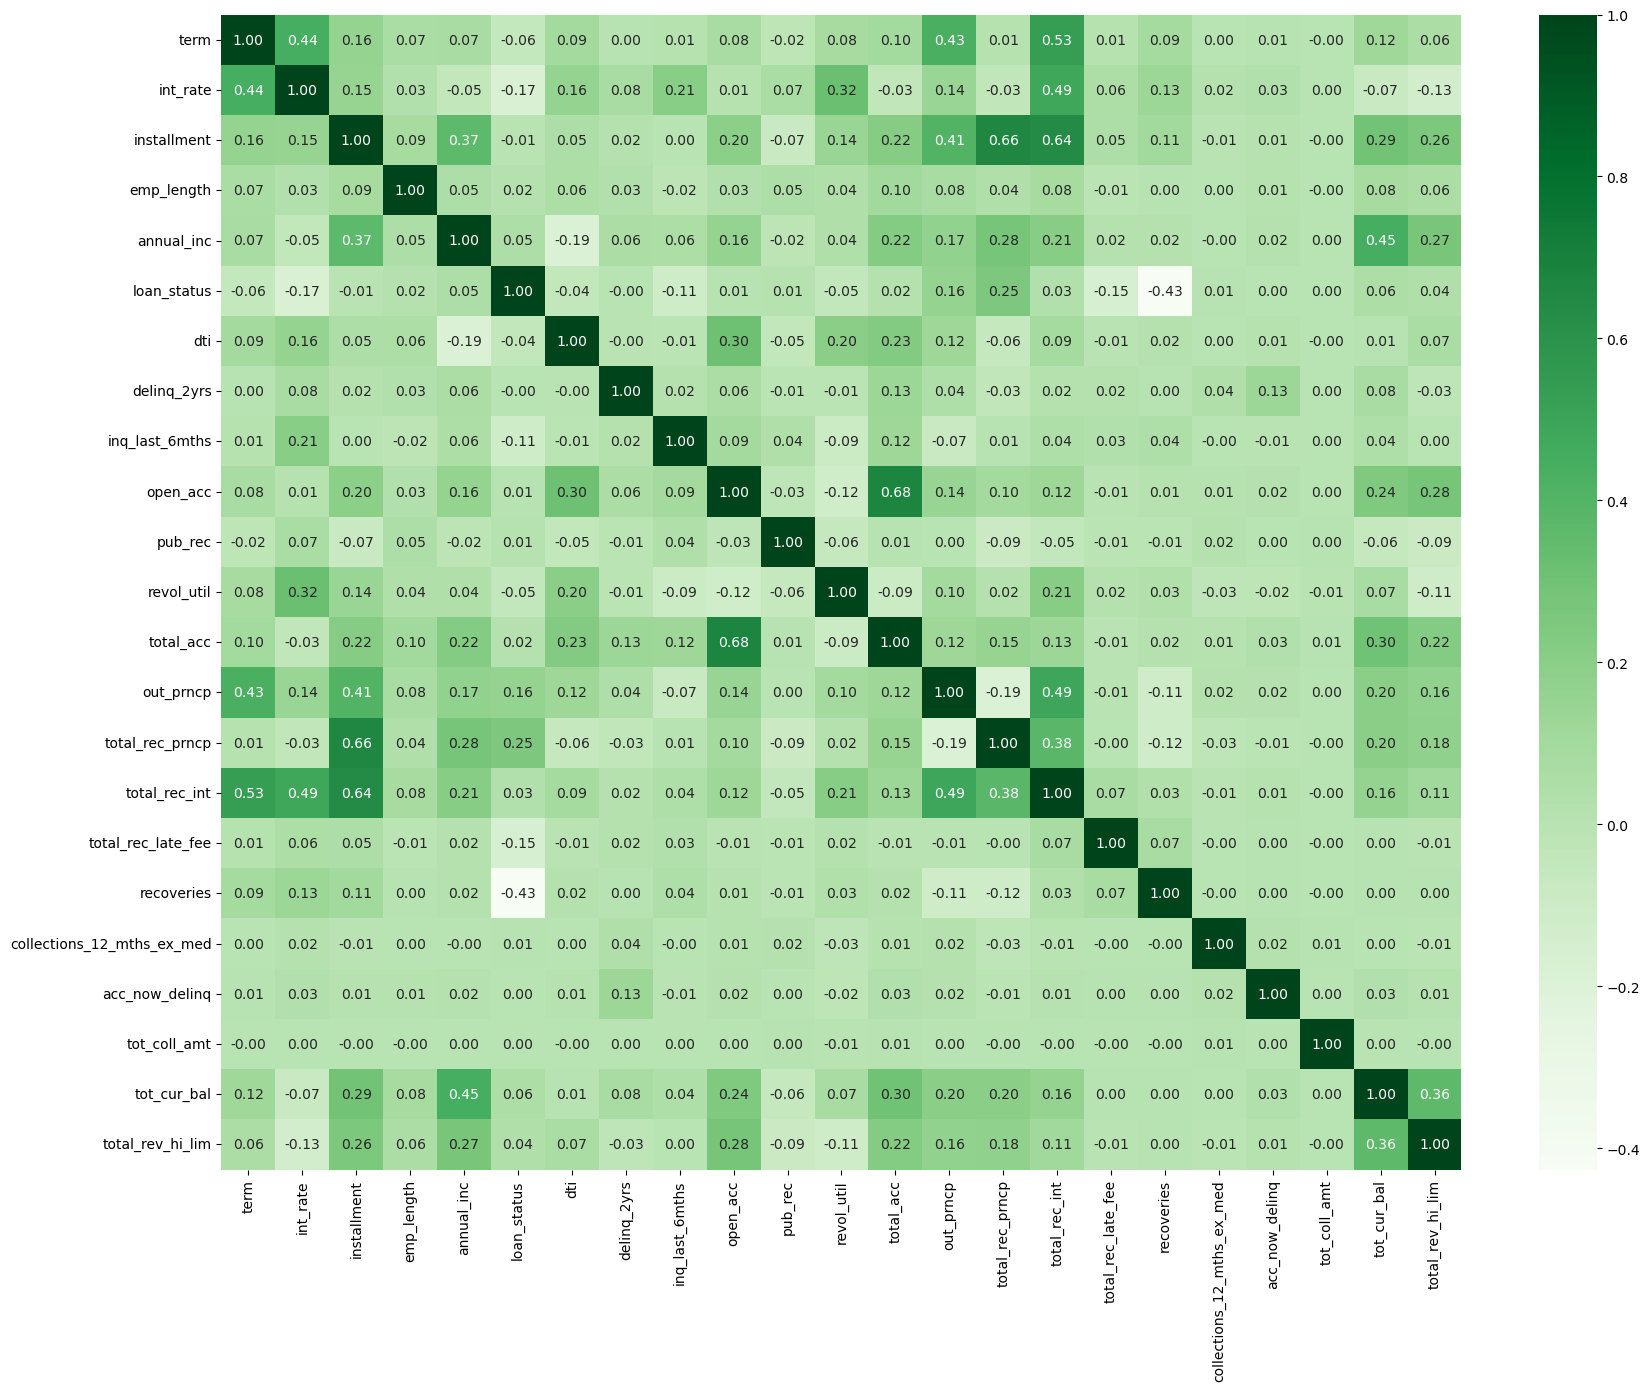

In [46]:
#Check Apakah masih ada yang redundant
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

In [47]:
df.corr()['loan_status'].sort_values()

recoveries                   -0.426263
int_rate                     -0.172282
total_rec_late_fee           -0.154241
inq_last_6mths               -0.110241
term                         -0.058383
revol_util                   -0.047981
dti                          -0.043026
installment                  -0.007176
delinq_2yrs                  -0.002164
acc_now_delinq                0.000468
tot_coll_amt                  0.001489
collections_12_mths_ex_med    0.005177
open_acc                      0.008081
pub_rec                       0.009916
emp_length                    0.019483
total_acc                     0.024612
total_rec_int                 0.026399
total_rev_hi_lim              0.040070
annual_inc                    0.048963
tot_cur_bal                   0.057112
out_prncp                     0.157245
total_rec_prncp               0.250500
loan_status                   1.000000
Name: loan_status, dtype: float64

In [48]:
#drop features that have correlation <0.006xxx
df.drop(['delinq_2yrs','acc_now_delinq','tot_coll_amt', 
         'collections_12_mths_ex_med'],axis=1,inplace=True)

In [49]:
new_nums = ['recoveries', 'int_rate', 'total_rec_late_fee', 'inq_last_6mths', 'term', 'revol_util', 'dti', 'installment',
            'open_acc', 'pub_rec', 'emp_length', 'total_acc', 'total_rec_int', 'total_rev_hi_lim', 'annual_inc',
            'tot_cur_bal', 'out_prncp', 'total_rec_prncp', 'loan_status']

### Categorical Feature Selection & Encoding

In [50]:
#Drop unnecessary categorical feature (nilai unique terlalu banyak)
df.drop(['issue_d', 'url', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 
         'last_credit_pull_d', 'application_type','emp_title'],axis=1,inplace=True)

#Drop karena sudah diwakilkan dengan grade, dan nilai unique terlalu banyak
df.drop(['sub_grade'],axis=1,inplace=True)

In [51]:
#Label Encoding Categorical Features:

#grade
df['grade'] = df['grade'].apply(lambda x : 0 if x=='G' else 1 if x=='F' else 2 if x=='E' else 3 if x=='D'
                                else 4 if x=='C' else 5 if x=='B' else 6)

#pymnt_plan
df['pymnt_plan'] = df['pymnt_plan'].apply(lambda x: 0 if x =='n' else 1)

#initial_list_status
df['initial_list_status'] = df['initial_list_status'].apply(lambda x : 0 if x=='f' else 1)

In [52]:
ohe_home_ownership = pd.get_dummies(df['home_ownership'], prefix='ho')
ohe_verification_status = pd.get_dummies(df['verification_status'], prefix='vs')
ohe_purpose = pd.get_dummies(df['purpose'], prefix='purpose')
df = pd.concat([df,ohe_home_ownership,ohe_verification_status,ohe_purpose],axis=1)
df.drop(['home_ownership','verification_status','purpose'],axis=1,inplace=True)

In [53]:
#drop because already represented with other feature
df.drop(['ho_MORTGAGE','vs_Not Verified'],axis=1,inplace=True)

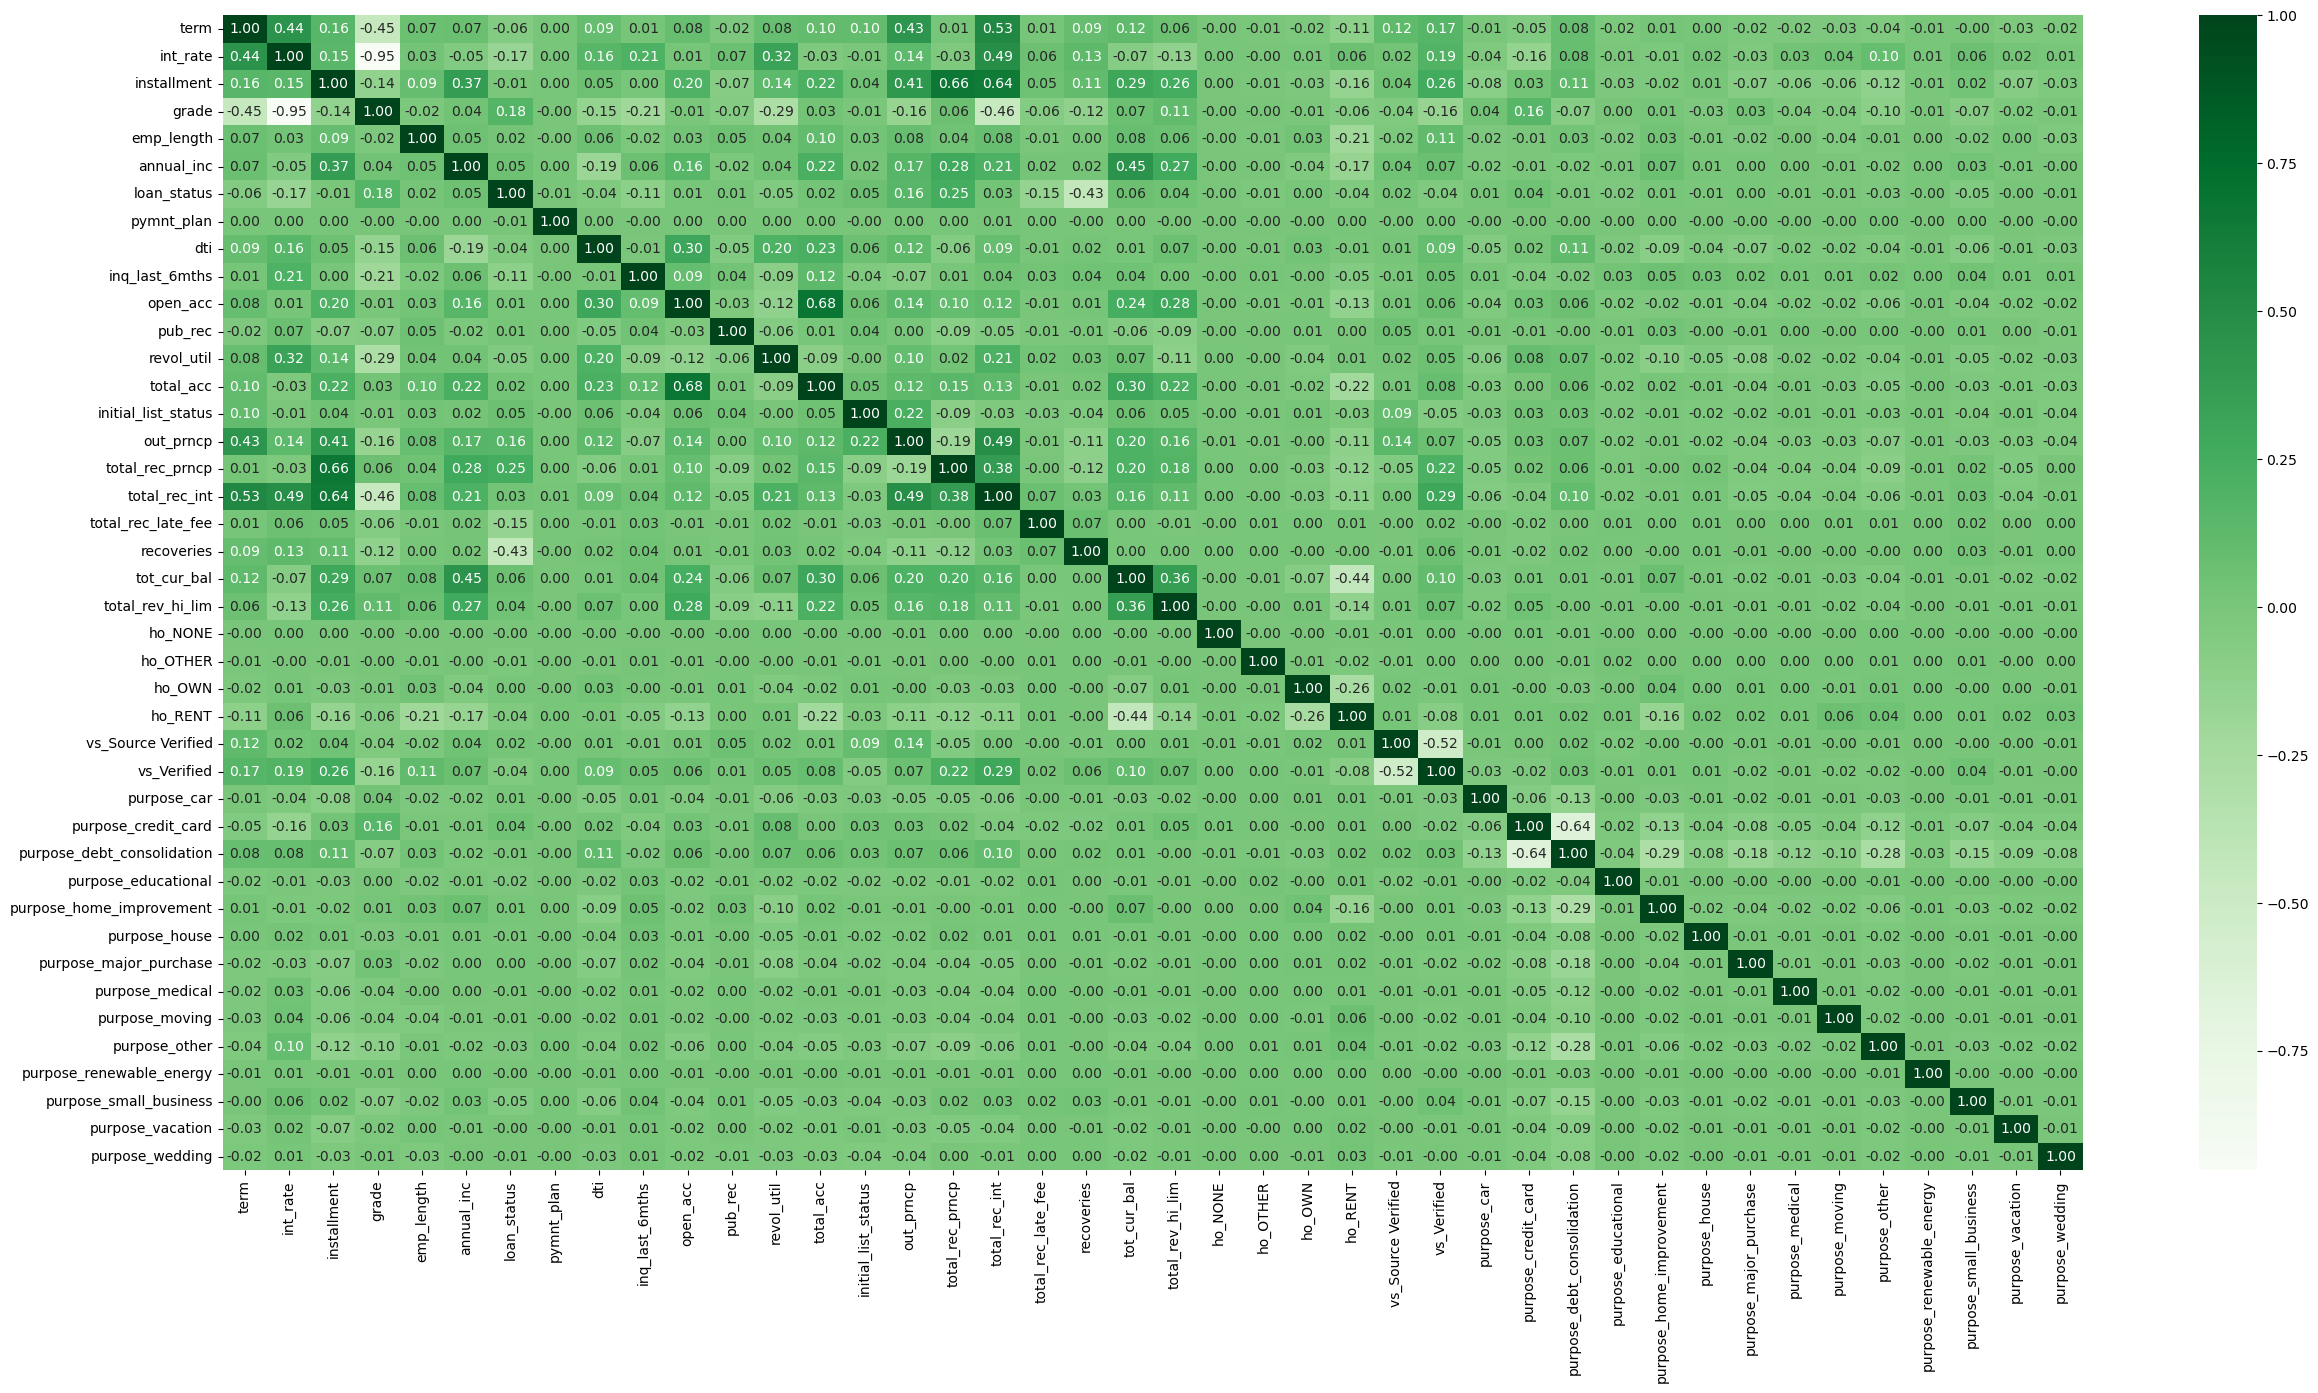

In [54]:
#Check Apakah masih ada yang redundant
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

In [55]:
df.drop(['grade'],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   installment                 466285 non-null  float64
 3   emp_length                  466285 non-null  int64  
 4   annual_inc                  466285 non-null  float64
 5   loan_status                 466285 non-null  int32  
 6   pymnt_plan                  466285 non-null  int64  
 7   dti                         466285 non-null  float64
 8   inq_last_6mths              466285 non-null  float64
 9   open_acc                    466285 non-null  float64
 10  pub_rec                     466285 non-null  float64
 11  revol_util                  466285 non-null  float64
 12  total_acc                   466285 non-null  float64
 13  initial_list_s

### Splitting Data Into Train & Test

In [57]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size = 0.2,stratify=y)
print(f'Number of Train Data: {X_train.shape[0]}')
print(f'Number of Test Data: {X_test.shape[0]}')

Number of Train Data: 373028
Number of Test Data: 93257


In [58]:
nums_std = new_nums.copy()
nums_std.remove('loan_status')
nums_std

['recoveries',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'term',
 'revol_util',
 'dti',
 'installment',
 'open_acc',
 'pub_rec',
 'emp_length',
 'total_acc',
 'total_rec_int',
 'total_rev_hi_lim',
 'annual_inc',
 'tot_cur_bal',
 'out_prncp',
 'total_rec_prncp']

### Standardization Numerical Features

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[nums_std] = sc.fit_transform(X_train[nums_std])
X_test[nums_std] = sc.transform(X_test[nums_std])
print(pd.Series(y_train).value_counts())

1    329689
0     43339
Name: loan_status, dtype: int64


### Modeling & Evaluation

In [60]:
#Classification evaluation (train test split method)
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

def evaluation(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('**EVALUATION WITH TRAIN TEST SPLIT**\nAUC Train vs Test:')
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')

In [61]:
from sklearn.model_selection import cross_validate, KFold

def cross_val_evaluation(model):
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sc = StandardScaler()
        scaling_features = nums_std
        X_train[scaling_features] = sc.fit_transform(X_train[scaling_features])
        X_test[scaling_features] = sc.transform(X_test[scaling_features])
        score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(class_weight='balanced',C=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced')

In [63]:
evaluation(model_lr)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.951548
AUC Score Test proba: 0.950829

Others Metrics Evaluation:
Test Accuracy Score : 0.9453
Precision Score Test: 0.9777
Recall Score Test : 0.96
F1 Score Test : 0.9688



In [64]:
cross_val_evaluation(model_lr)

roc_auc (crossval train): 0.9550776727205406
roc_auc (crossval test): 0.9366190341881963


In [65]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    cm = confusion_matrix(y_test, model.predict(X_test))
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

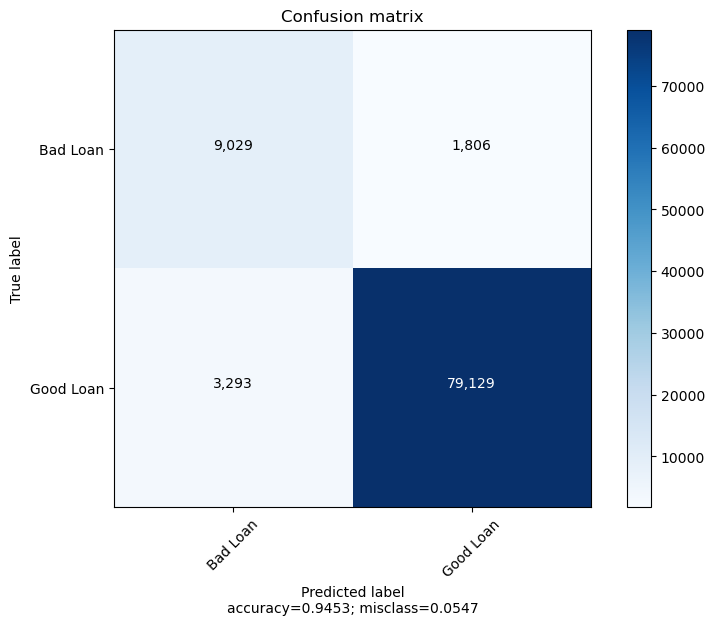

In [66]:
#Confusion Matrix
target_names = ['Bad Loan','Good Loan']
plot_confusion_matrix(model_lr,target_names,title='Confusion matrix', cmap=None,normalize=False)

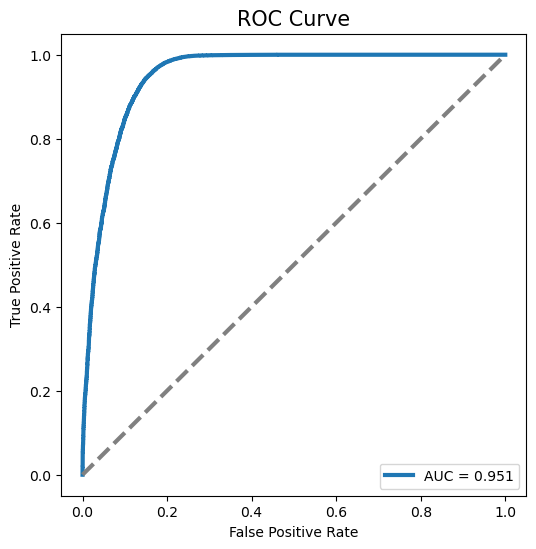

In [67]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, tr = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()
plt.show()

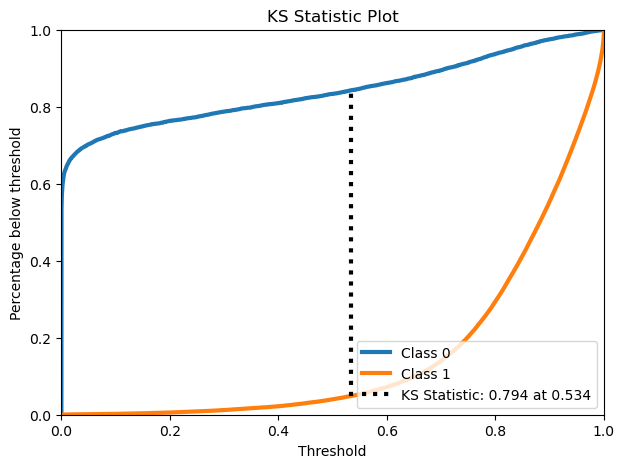

In [68]:
import scikitplot as skplt
y_pred_proba = model_lr.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

# Simulation

In [69]:
y_pred = model_lr.predict(X_test)
X_test_simulation = X_test.copy()

In [70]:
X_test_simulation['Actual'] = y_test
X_test_simulation['Predict'] = y_pred
X_test_simulation = X_test_simulation[['Actual','Predict']]
X_test_simulation

,Actual,Predict
181264,1,1
124986,1,1
166443,1,1
320616,1,1
105825,1,1
...,...,...
399451,0,1
126701,0,0
73721,1,1
237524,1,1


In [71]:
#True Prediction on Bad Loan
X_test_bad_loan_true = X_test_simulation[((X_test_simulation['Actual']==0) & (X_test_simulation['Predict']==0))]
X_test_bad_loan_true

,Actual,Predict
191333,0,0
226341,0,0
197751,0,0
356811,0,0
357063,0,0
...,...,...
20171,0,0
270249,0,0
39501,0,0
163365,0,0


From 93257 customers, machine learning can detect a bad-loan customers by **accurately predict 9029 bad-loan customers**.

In [72]:
#Benchmark on Bad Loan
X_benchmark_bad = X_test_simulation[X_test_simulation['Actual']==0]
X_benchmark_bad

,Actual,Predict
191333,0,0
226341,0,0
197751,0,0
356811,0,0
357063,0,0
...,...,...
39501,0,0
163365,0,0
372954,0,1
399451,0,1


When lending company using manual decision making, turns out there are **10835 customers classified as bad loan**. <br>
The proportion of Current Bad-Loan = 10835 / 93257 = **11.61%**

**9029 Bad-Loan** application will be REJECT. So the remaining actual bad-loan = 10835-9029 = **1806 Bad-Loan** <br>
The proportion of Bad-Loan remaining = 1806 / 93257 = **1.93%**